<a href="https://colab.research.google.com/github/SaptarshiAcharyya99/Insurance/blob/master/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading the Dataset**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("/content/insurance (2).csv")

# **Exploratory Data Analysis**



In [ ]:
data.shape #data has 1338 rows and 7 columns/content/insurance (2).csv/content/insurance (2).csv

(1338, 7)

In [ ]:
data.head()
#quantitiative(discrete numeric) - (age,children)
#categorical - (age,smoker,region)
#continuous numeric - (charges,bmi)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.describe(include="all") # 5 point summary
# from the 5 point summary , it does look like the bmi is normally distrubuted
# for charges , the data might be right skewed becuase Q2 is closer to Q1


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**Data Distribution**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


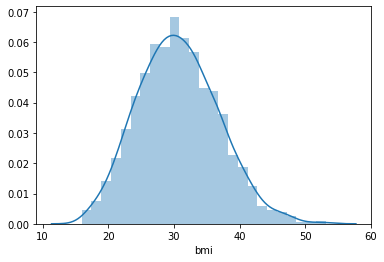

In [ ]:
import  seaborn as sns
sns.distplot(data['bmi'])

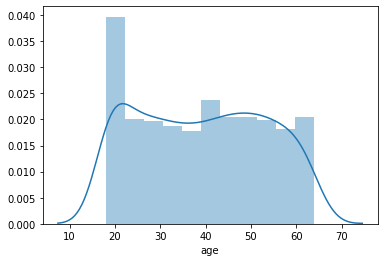

In [ ]:
sns.distplot(data['age']) # evenly spread with most frequent value at 20

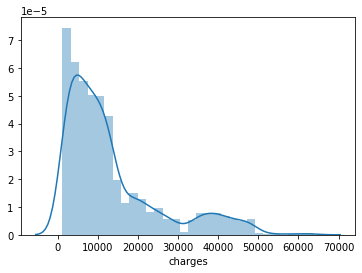

In [ ]:
sns.distplot(data['charges'])

In [ ]:
data.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Skewness of data = 3*(Mean- Median)/Standard Deviation**

can be represented visually using boxplot or distribution plot



In [ ]:

from scipy.stats import skew
print("Skewness of bmi")# data is almost symmetrical
skew(data['bmi'])


Skewness of bmi


0.28372857291709386

In [ ]:
print("Skewness of age") # data is almost symmetrical
skew(data['age'])

Skewness of age


0.055610083072599126

In [ ]:
print("Skewness of charges") #positive skewed
skew(data['charges'])

Skewness of charges


1.5141797118745743

**Outlier Detection**

In [ ]:
def outlier(x):
  outlier=[]
  Q1=np.percentile(x,25,interpolation = 'midpoint')
  Q2=np.percentile(x,50,interpolation = 'midpoint')
  Q3=np.percentile(x,75,interpolation = 'midpoint')
  IQR=Q3-Q1
  low_lim = Q1 - 1.5 * IQR 
  up_lim = Q3 + 1.5 * IQR
  for i in x:
    if((i<low_lim)or(i>up_lim)):
      outlier.append(i)
  print(outlier)
  print("Number of outliers =")
  print(len(outlier))   

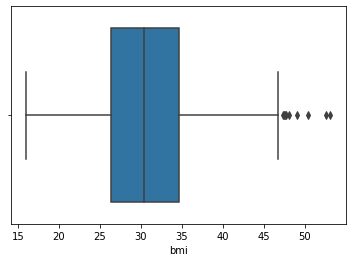

In [ ]:
sns.boxplot(x=data['bmi'])

In [ ]:
print("Outliers of bmi are") # data has a few number of outliers. Most customers have bmi within normal range.
outlier(data['bmi'])

Outliers of bmi are
[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]
Number of outliers =
9


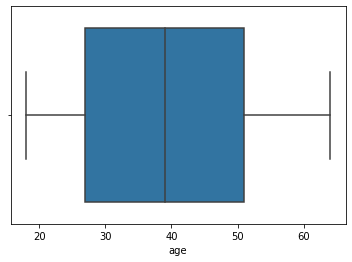

In [ ]:
sns.boxplot(x=data['age'])

In [ ]:
print('Outliers in age are') # data has no outliers
outlier(data['age'])

Outliers in age are
[]
Number of outliers =
0


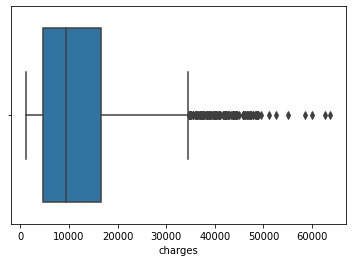

In [ ]:
sns.boxplot(x=data['charges'])

In [ ]:
print('Outliers in charges are') #too many outliers in charges. A lot of customers are charged more than average.
outlier(data['charges'])

Outliers in charges are
[39611.7577, 36837.467000000004, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.837999999996, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.135610000005, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.074479999996, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 36189.1017, 4

Distribution of categorical values(incl children )

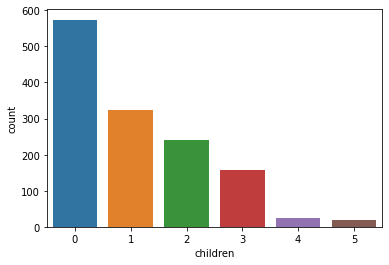

In [ ]:
sns.countplot(data['children']) # most customers don't have children and very few have more than 3 children

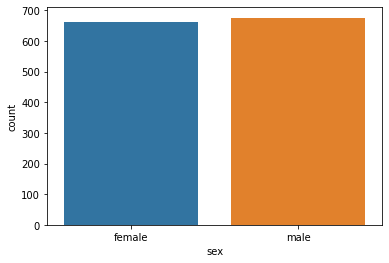

In [ ]:
sns.countplot(data['sex']) # both sexes are almost equally distributed

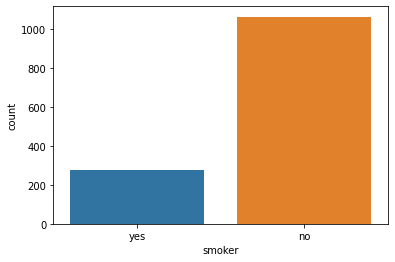

In [ ]:
sns.countplot(data['smoker']) # most customers seem to be non-smokers

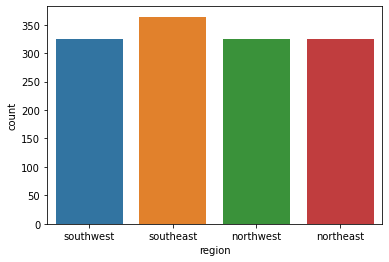

In [ ]:
sns.countplot(data['region']) # Customers are almost equally distributed in all regions.
# southeast region has more number of customers than other regions in our sample 

Pair Plot

In [ ]:
# label encoding categorical values(sex)
data['sex']=data['sex'].replace('female',0)
data['sex']=data['sex'].replace('male',1)

In [ ]:
# label encoding categorical values(smoker)
data['smoker']=data['smoker'].replace('no',0)
data['smoker']=data['smoker'].replace('yes',1)


In [ ]:
# label encoding categorical values(region)
data['region']=data['region'].replace('southwest',1)
data['region']=data['region'].replace('southeast',2)
data['region']=data['region'].replace('northwest',3)
data['region']=data['region'].replace('northeast',4)

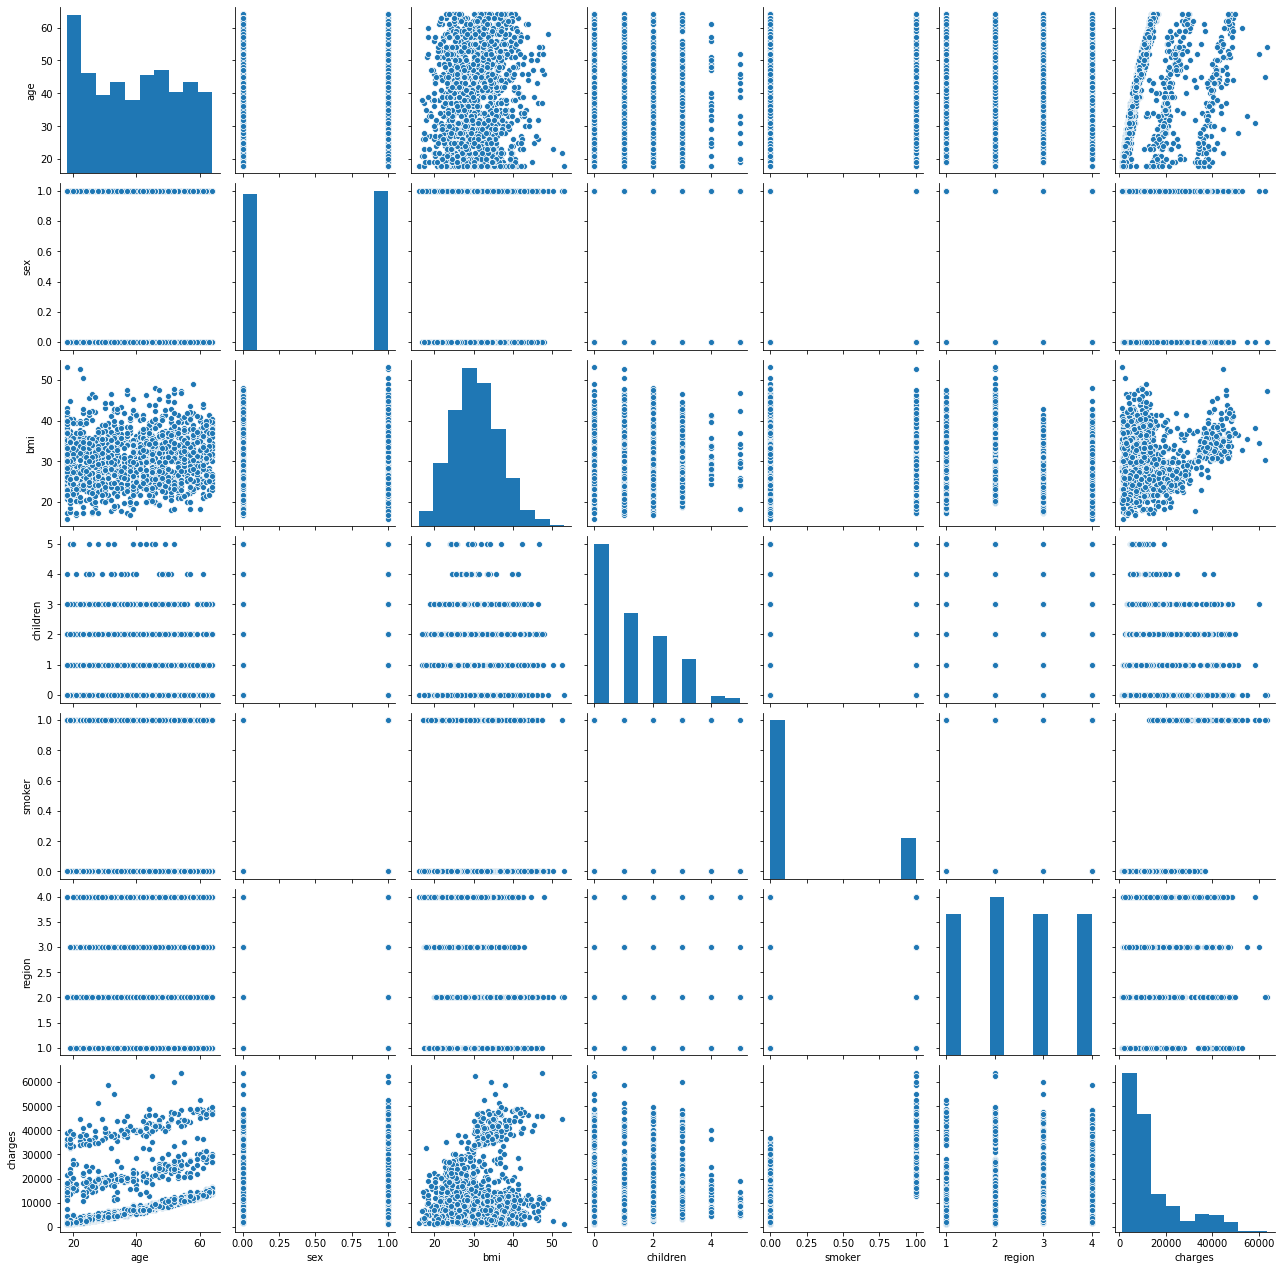

In [ ]:
sns.pairplot(data)

1)Smokers seems to have higher medical charges compared to non-smokers.

2)age and charges have a slight positive correlation, i.e. medical charges increase with the age of customers



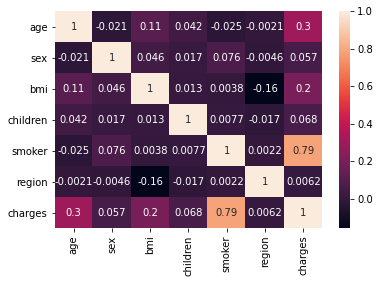

In [ ]:
corr = data.corr() # we plot a correlation heatmap to further our claims.
sns.heatmap(corr,annot=True)

# **Statistical Inference**

**Problem Statement 1**

Do charges of people who smoke differ significantly from the people who don't?

In [ ]:
def reject(p):
  a=0.05
  if(p<a):
    print("We reject the null hypothesis")
  else :
    print("We fail to reject null hypothesis")

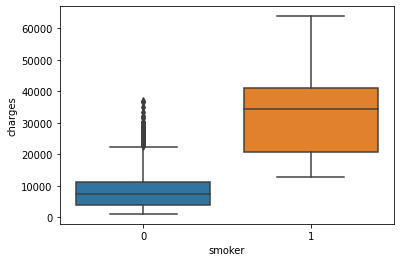

In [ ]:
sns.boxplot(x='smoker',y='charges',data=data)
#customers who smoke clearly face higher charges as suggested by the data, 
#but can we say the same regarding the population with this evidence?

Ho = both groups have the same mean i.e. charges of smokers and non smokers 

Ha = both groups have significantly different means

statistical test: 2 sample t-test

a = 0.05

In [ ]:
from scipy.stats import ttest_ind
group1 = np.array(data[data['smoker']==0].charges)
group2 = np.array(data[data['smoker']==1].charges)
t , pvalue= ttest_ind(group1,group2)
print(t,pvalue)
reject(pvalue)

-46.664921172723716 8.271435842177219e-283
We reject the null hypothesis


**Hence we conclude that there is a significant difference in charges between customers who smoke and customers who do not smoke.**


**Problem Statement 2**

Does bmi of males differ significantly from that of females?

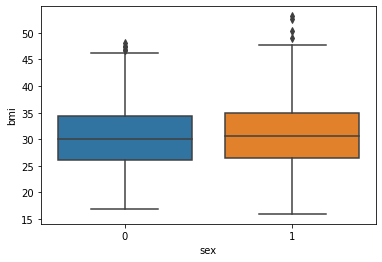

In [ ]:
sns.boxplot(x='sex',y='bmi',data=data)
#it seems like there is no signifacnt difference in bmi between male and females from the provided sample.

Ho = both groups have the same mean i.e. bmi values of male and female 

Ha = both groups have significantly different means

statistical test: 2 sample t-test

a = 0.05

In [ ]:
group1 = np.array(data[data['sex']==0].bmi)
group2 = np.array(data[data['sex']==1].bmi)
t , pvalue= ttest_ind(group1,group2)
print(t,pvalue)
reject(pvalue)

-1.696752635752224 0.08997637178984932
We fail to reject null hypothesis


**Therefore we conclude that there is no real effect of gender on bmi.**

**Problem Statement 3**

Is the proportion of smokers significantly different in different genders?

In [ ]:
from matplotlib import pyplot as plt

female=data[data['sex']==0]
female_smoker=female[female['smoker']==1]
female_nonsmoker=female[female['smoker']==0]

male=data[data['sex']==1]
male_smoker=male[male['smoker']==1]
male_nonsmoker=male[male['smoker']==0]

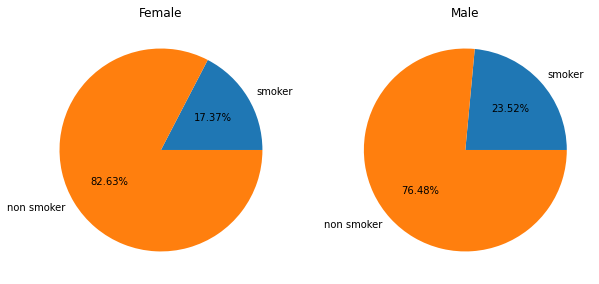

In [ ]:

female_count=[len(female_smoker),len(female_nonsmoker)]
male_count=[len(male_smoker),len(male_nonsmoker)]
label=['smoker','non smoker']
fig = plt.figure(figsize =(10, 7)) 
ax1 = plt.subplot2grid((1, 2), (0, 0))
plt.pie(female_count, labels = label,autopct='%1.2f%%')
plt.title("Female")
ax1 = plt.subplot2grid((1, 2), (0, 1)) 
plt.pie(male_count, labels = label,autopct='%1.2f%%') 
plt.title("Male")
plt.show()

the data suggests that there is a difference between proportion of smokers , based on their sex.



1.   Both data values are categorical
2.   We want to see if the proportion of smokers in the female population is significantly different than it is in the male population

 Ho = The proportions are equal

 Ha = The two proportions are not equal

statistical test: two way test of proportion

a=0.05


In [ ]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([len(female_smoker), len(male_smoker)] , [len(female), len(male)])
print(stat , pval)
reject(pval)

-2.7867402154855503 0.005324114164320532
We reject the null hypothesis


**Therefore we conclude that the proportion of smokers is significantly different among different genders**

**Problem Statement 4**

Is the distribution of bmi across women with no children, one child and two children, the same?


In [ ]:
group1=female[female['children']==0]
group2=female[female['children']==1]
group3=female[female['children']==2]

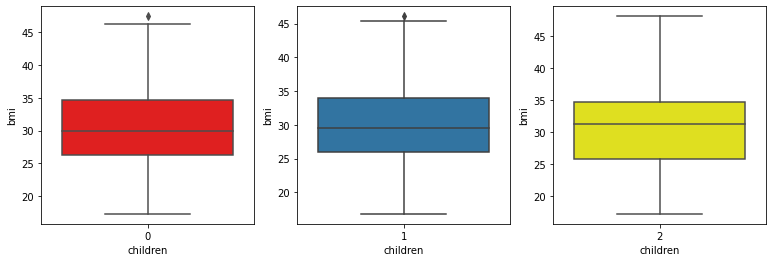

In [ ]:
fig = plt.figure(figsize =(13, 4))
ax1 = plt.subplot2grid((1, 3), (0, 0))
sns.boxplot (x='children',y='bmi',data=group1,color='red')
ax1 = plt.subplot2grid((1, 3), (0, 1))
sns.boxplot(x='children',y='bmi',data=group2)
ax1 = plt.subplot2grid((1, 3), (0, 2))
sns.boxplot(x='children',y='bmi',data=group3 , color='yellow')

Ho = 3 groups(women with 0 ,women with 1 and women with 3 children) have equal mean.

Ha = The 3 groups do not have equal mean.

Statistical test: One way ANOVA

a=0.05

In [ ]:
import scipy.stats as stats
f_stat, p_value = stats.f_oneway(group1['bmi'],group2['bmi'],group3['bmi'])
print(f_stat,p_value)
reject(p_value)

0.3344720147757968 0.7158579926754841
We fail to reject null hypothesis


**Therefore we may conclude that for 3 or less children, bmi of women remain unaffected by the number of children**

#**SUMMARY**



1. There is a significant difference in charges between customers who smoke and customers who do not smoke.
2. There is no real effect of gender on bmi.

3. Proportion of smokers is significantly different among male and females.

4. For 3 or less children, bmi of women remain unaffected by the number of children

